In [1]:
import sys
sys.path.insert(0, 'd:\\ML\\ML_laba4_env\\Lib\\site-packages')
# sys.path.remove('d:\\ML\\ML_laba4_env\\Lib\\site-packages')
sys.path

['d:\\ML\\ML_laba4_env\\Lib\\site-packages',
 'c:\\Python313\\python313.zip',
 'c:\\Python313\\DLLs',
 'c:\\Python313\\Lib',
 'c:\\Python313',
 '',
 'C:\\Users\\Василий\\AppData\\Roaming\\Python\\Python313\\site-packages',
 'c:\\Python313\\Lib\\site-packages']

In [2]:
from torchvision.models.detection import ssd300_vgg16
from keras_vggface.vggface import VGGFace

### **Детекция лица с помощью модели на основе SSD**

Будет использована модель ssd300_vgg16 из библиотеки torchvision

In [6]:
import torch
import torchvision
from torchvision.models.detection import ssd300_vgg16
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Инициализируем модель

In [7]:
ssd_model = ssd300_vgg16(pretrained=True)
ssd_model.eval()  

d:\ML\ML_laba4_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\ML\ML_laba4_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

Настраиваем тип девайса

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ssd_model.to(device)

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

Загружаем изображения

In [9]:
# SSD300 принимает на вход изображения 300x300
transform = transforms.Compose([
    transforms.Resize((300, 300))
])

image1 = transform(Image.open("imgs\\selfie1.jpg").convert('RGB'))
image2 = transform(Image.open("imgs\\selfie2.jpg").convert('RGB'))
image3 = transform(Image.open("imgs\\obama.jpg").convert('RGB'))

# Переводим изображения в тензоры
transform = transforms.Compose([
    transforms.ToTensor()
])

image1_tensor = transform(image1).unsqueeze(0)
image2_tensor = transform(image2).unsqueeze(0)
image3_tensor = transform(image3).unsqueeze(0)

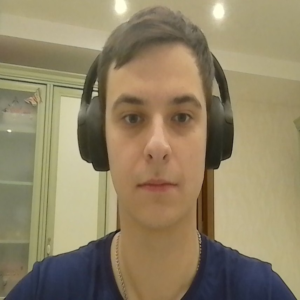

In [22]:
image1

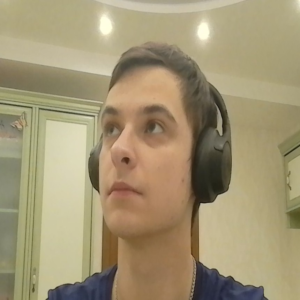

In [23]:
image2

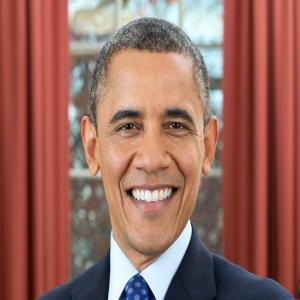

In [24]:
image3

Определим функцию для детекции изображения

In [12]:
def detect_objects(image_tensor, confidence_threshold=0.5):

    image_tensor = image_tensor.to(device)
    
    # Проводим детекцию
    with torch.no_grad():
        predictions = ssd_model(image_tensor)
    
    # Извлекаем предсказания
    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    
    # Фильтруем по коэффиценту confidence_threshold
    mask = scores >= confidence_threshold
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]
    
    return boxes, scores, labels

In [ ]:
prediction1 = list(detect_objects(image1_tensor))
prediction2 = list(detect_objects(image2_tensor))
prediction3 = list(detect_objects(image3_tensor))

Используемая модель была обучена на датасете COCO. Далее приведены имена классов объектов, которые могут быть рвспознаны

In [11]:
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
def visualize_detections(image, boxes, scores, labels):
    fig, ax = plt.subplots(1, figsize=(5, 5))
    
    # Выводим изображение
    ax.imshow(image)
    
    # Рисуем баундинг боксы
    for box, score, label in zip(boxes, scores, labels):
        if score > 0.5: 
            x1, y1, x2, y2 = box
            
            rect = patches.Rectangle(
                (x1, y1), x2 - x1, y2 - y1,
                linewidth=2, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)
            
            class_name = COCO_CLASSES[label]
            ax.text(
                x1, y1 - 5,
                f'{class_name}: {score:.2f}',
                bbox=dict(facecolor='red', alpha=0.5),
                fontsize=10, color='white'
            )
    
    ax.axis('off')
    plt.show()

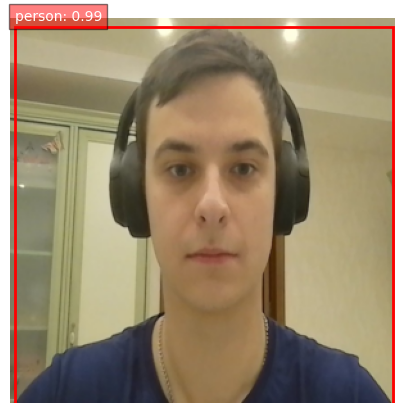

In [28]:
visualize_detections(image1, prediction1[0], prediction1[1], prediction1[2])

### **Распознавание лица с помощью VGGFace**

In [12]:
import numpy as np
from scipy.spatial import distance

from tensorflow.keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

Инициализируем модель

In [3]:
vggface = VGGFace(model='vgg16')

In [4]:
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg')

Загружаем изображения в формате 224x224. Затем детектируем изображения и в переменной features сохраняем векторы признаков детектированных изображений

In [25]:
vggface_image1 = image.load_img("imgs\\selfie1.jpg", target_size=(224, 224))
vggface_image2 = image.load_img("imgs\\selfie2.jpg", target_size=(224, 224))
vggface_image3 = image.load_img("imgs\\obama.jpg", target_size=(224, 224))

features = []

for img in (vggface_image1, vggface_image2, vggface_image3):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1)
    features.append(vggface.predict(x).flatten())
    

features[0] - вектор признаков 1 селфи, features[1] - вектор признаков 2 селфи, features[2] - вектор признаков фото Обамы 

In [26]:
print(distance.euclidean(features[0], features[1]))
print(distance.euclidean(features[0], features[2]))
print(distance.euclidean(features[1], features[2]))

0.19291651248931885
0.24669411778450012
0.15819409489631653


Почему то пишет, что между моей фоткой №2 и Обамой сходства больше чем между моими 1 и 2 фотками :/

Попробуем сделать фотки без наушников

In [27]:
vggface_image1 = image.load_img("imgs\\selfie12.jpg", target_size=(224, 224))
vggface_image2 = image.load_img("imgs\\selfie22.jpg", target_size=(224, 224))

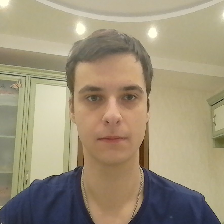

In [28]:
vggface_image1

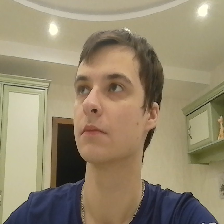

In [29]:
vggface_image2

In [31]:
features = []

for img in (vggface_image1, vggface_image2, vggface_image3):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1)
    features.append(vggface.predict(x).flatten())
    

In [32]:
print(distance.euclidean(features[0], features[1]))
print(distance.euclidean(features[0], features[2]))
print(distance.euclidean(features[1], features[2]))

0.055016081780195236
0.15853241086006165
0.16213712096214294


Теперь за Обаму меня не принимает ;)